In [1]:
#Generating Data:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

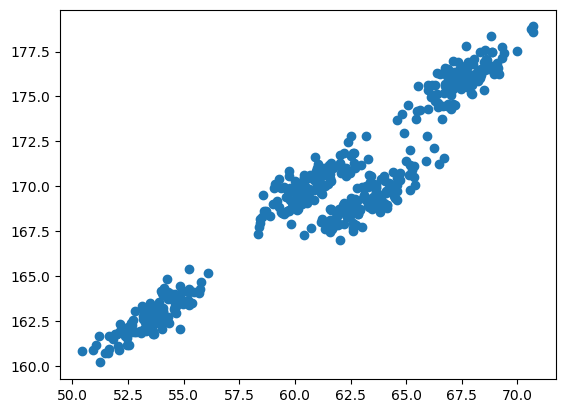

In [2]:
X = pd.read_csv('Clustering_gmm.csv')
X=np.array(X)
plt.scatter(X[:,0],X[:,1])


C:\Users\user\anaconda3\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


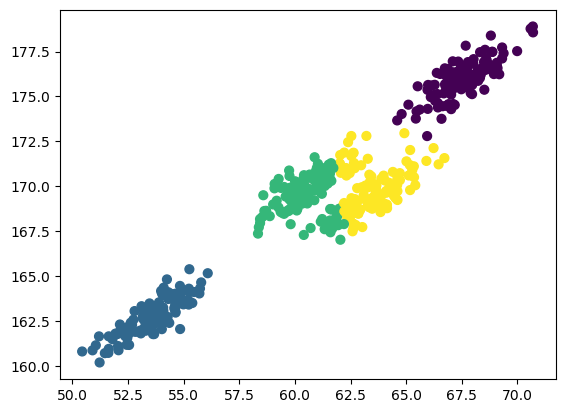

In [3]:
#Applying K-Means:
from sklearn.cluster import KMeans
kmm = KMeans(n_clusters=4)
kmm.fit(X)
labels = kmm.predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, s=40, cmap='viridis')

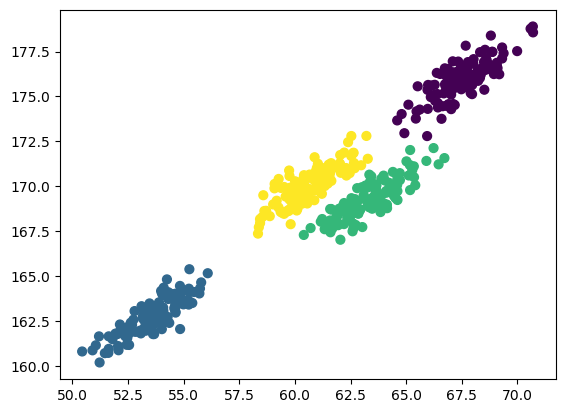

In [4]:
#GMM:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(X)
labels = gmm.predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, s=40, cmap='viridis')

In [5]:
#Predicting probability:
probs = gmm.predict_proba(X)
probs[0,:]
props = probs.round(6)
print(probs)

[[9.99999976e-01 1.14682842e-38 1.27149288e-13 2.35950785e-08]
 [1.00000000e+00 4.26530665e-51 4.92992862e-21 1.61703335e-13]
 [2.97466764e-08 1.14934922e-12 2.76372906e-06 9.99997207e-01]
 ...
 [2.80785887e-39 1.00000000e+00 2.24876670e-13 1.78434898e-13]
 [1.94793713e-50 1.00000000e+00 3.93178502e-22 8.36652898e-18]
 [6.38224922e-10 8.71270150e-11 1.73422042e-06 9.99998265e-01]]


In [6]:
#Looking for parameters:
gmm.means_

array([[ 67.51014715, 175.97136573],
       [ 53.60032216, 162.76480188],
       [ 63.29374518, 169.26263398],
       [ 60.65944689, 170.03409967]])

In [7]:
gmm.weights_

array([0.251111  , 0.25000039, 0.24875332, 0.2501353 ])

In [8]:
gmm.covariances_

array([[[1.30083701, 0.97751266],
        [0.97751266, 1.15396626]],

       [[1.24923233, 0.95686493],
        [0.95686493, 1.02835847]],

       [[1.56967116, 1.12232885],
        [1.12232885, 1.1367498 ]],

       [[1.31511714, 0.97508692],
        [0.97508692, 1.08379767]]])

In [9]:
#AIC and BIC for determining Optimal K:
from sklearn.mixture import GaussianMixture
Sum_bic = []
Sum_aic = []

K = range(1,10)
for k in K:
    gmm = GaussianMixture(n_components=k)
    gmm = gmm.fit(X)
    Sum_bic.append(gmm.bic(X))
    Sum_aic.append(gmm.aic(X))

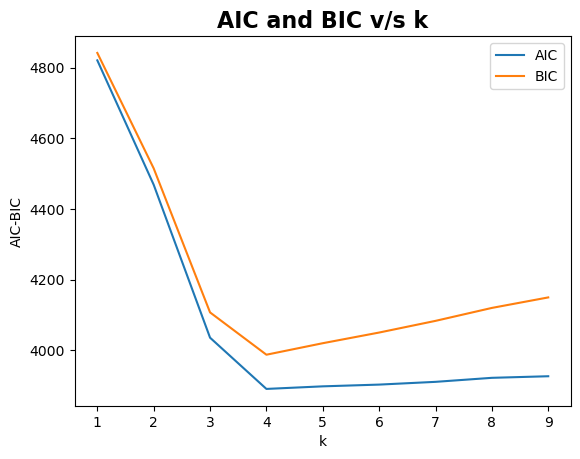

In [10]:
x1 = K
y1 = Sum_aic
plt.plot(x1, y1, label = "AIC")
x2 = K
y2 = Sum_bic
plt.plot(x2, y2, label = "BIC")

plt.title("AIC and BIC v/s k", fontsize=16, fontweight='bold')
plt.xlabel("k")
plt.ylabel("AIC-BIC")
plt.legend(loc='upper right')
plt.show()